# (Ford GoBike System Data)
## by (Marwa Ibrahim Alalfi)

## Investigation Overview

Ford GoBike System Data dataset contains trips data of the fordgo bike rental system. An initial exploration will be done and follow it with data cleaning phase in order to clearly visualize data and discover insights and trends.
I had to do some cleaning ,data wrangling and some transformations before working.

    - converting variables types to the appropriate data types
    - dropping unneeded columns 
    - dropping null records
    - duration in seconds is changed to duration in minutes for better visualization  
    - member birth year has outliers   
    - Age groups are created for better classification and visualization
    - extract hour from start time / end time




## Dataset Overview

This dataset contains 183412 records with 16 features. 9 variables are numeric, 2 variables are timestamp and the remaining 7 variables are categorical

1- Numeric variables:
duration_sec, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bike_id, member_birth_year

2- Timestamp variables :
start_time, end_time

3- String:
start_station_name, end_station_name

4- Categorical variables:
user_type, member_gender, bike_share_for_all_trip

Main feature of interest
trip duration/hours , User Type, Member Year of Birth , Member Gender

Other features in the dataset that will help support my investigation into your feature of interest
Start Time , End Time and other features to be transformed from the current features

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df =pd.read_csv('bike_mod.csv')

## (Univariate Visualization)
## (visualization 1)



- This histogram shows that more than 140000 bike trips were held with an average trip duration of 12 minutes

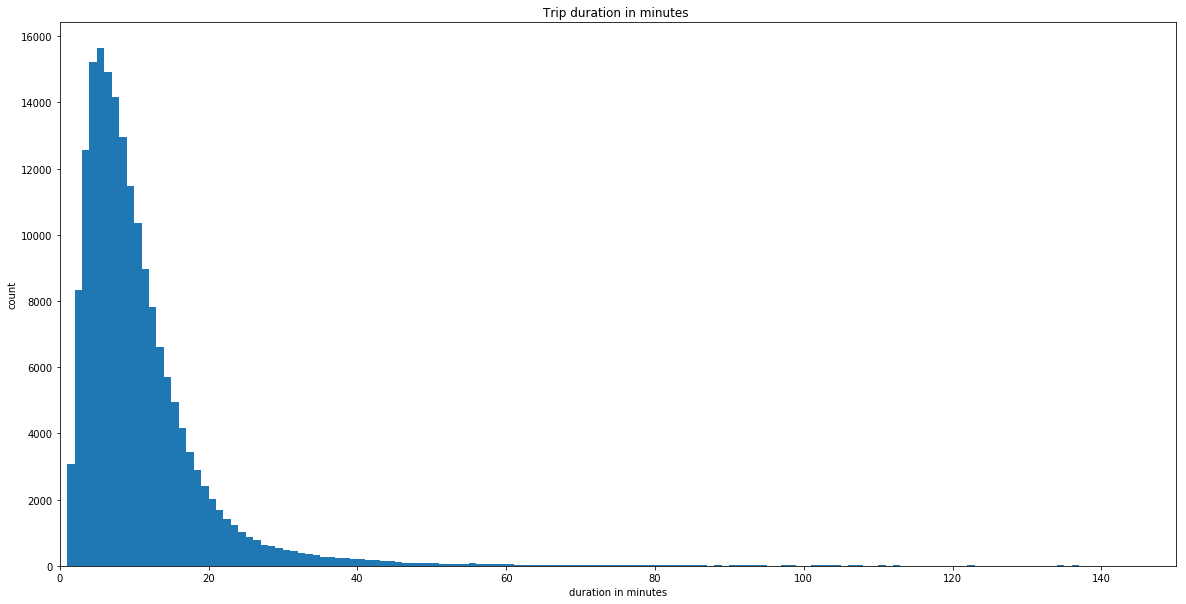

In [4]:
#create bins / then plot a histogramof trip duration in minutes 
plt.figure(figsize=[20, 10])
binsize = 1
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)
plt.hist(data = df, x = df['duration_min'] , bins = bins )
 
plt.xlabel('duration in minutes')
plt.ylabel('count')
plt.xlim((0,150));
plt.title('Trip duration in minutes ')
plt.show();


## (Visualization 2)



- It's very obvious from the figure above is that Males is thrice the females

- Males are more often using this bikeshare service 

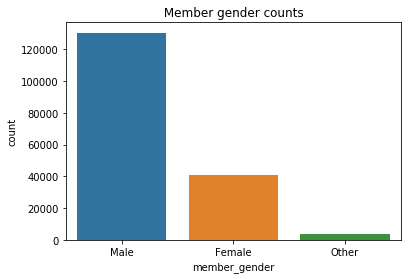

In [6]:
#get the count of member gender / index of count then plot a horizontal bar chart
freq1 = df['member_gender'].value_counts()
gen_order1 = freq1.index
sb.countplot(data=df, x='member_gender',  order=gen_order1)
plt.title(' Member gender counts ');

## (Visualization 3)


- This figure shows that  89% of  Ford GoBike users are  subscribers

- Subsribers are approximately 8 times more than customers 

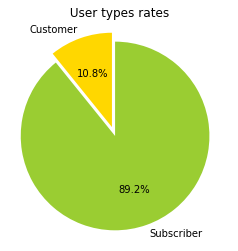

In [7]:
#get the count of user types / index of count then plot a pie plot  
colors = [  'yellowgreen','gold']
sorted_counts = df['user_type'].value_counts()
explode = (0 , 0.1) 
plt.pie(sorted_counts, labels = sorted_counts.index,explode =explode , startangle = 90, autopct='%1.1f%%', counterclock = False, colors = colors );
plt.axis('square')
plt.title(' User types rates ');


## (Visualization 4)


- This figures shows that 9.5 % of the overall users are members who are enrolled in the Bike Share for All 
      (program for low-income residents)
 

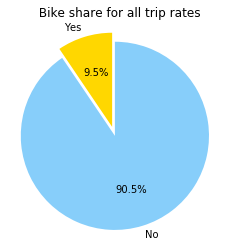

In [8]:
#get the count of bike_share_for_all_trip / index of count then plot a pie plot  
colors_list = [ 'lightskyblue','gold']
sorted_counts1 = df['bike_share_for_all_trip'].value_counts()
explode = (0 , 0.1) 
plt.pie(sorted_counts1, labels = sorted_counts1.index, explode =explode , startangle = 90, autopct='%1.1f%%', counterclock = False,colors=colors_list);
plt.axis('square')
plt.title(' Bike share for all trip rates ');

## (Bivariate Visualization )
## (Visualization 1)
 - This plot shows that the peak hour for all users ( subscriber - customer ) is 5 pm and 8 am 

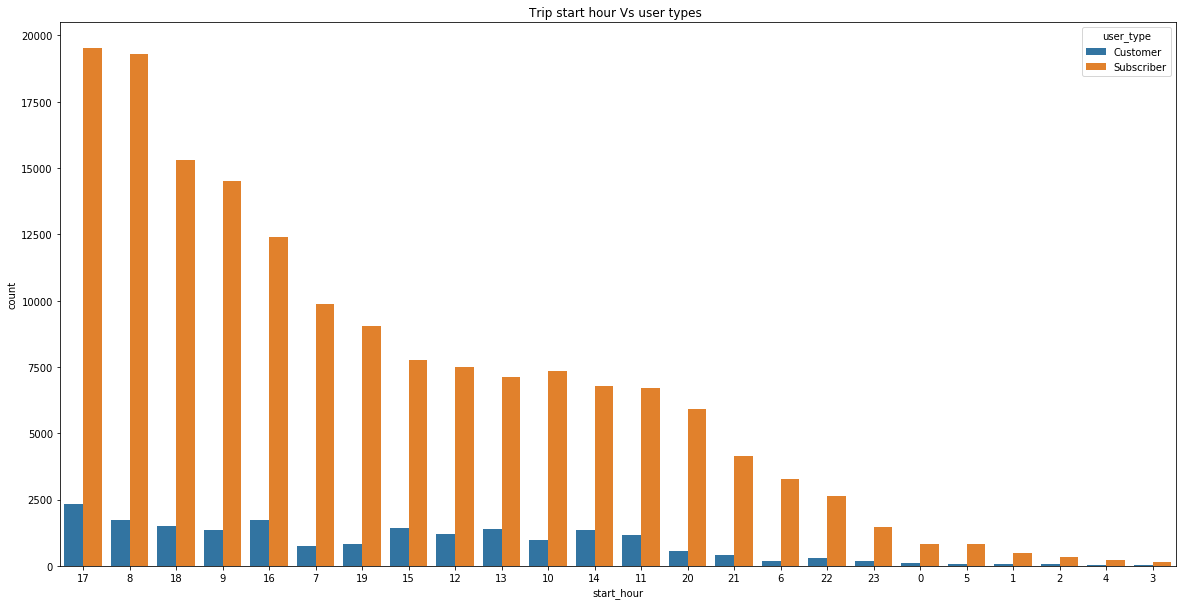

In [9]:
#get the count of user_type in each start_hour then plot a horizontal bar chart
plt.figure(figsize=[20, 10])
freq3 = df['start_hour'].value_counts()
gen_order3 = freq3.index
sb.countplot(data=df, x='start_hour', hue ='user_type' , order=gen_order3)
plt.title('Trip start hour Vs user types ');

## (Visualization 2)
- peak hour for male riders is 5 pm 

- peak hour for female riders is 8 am 


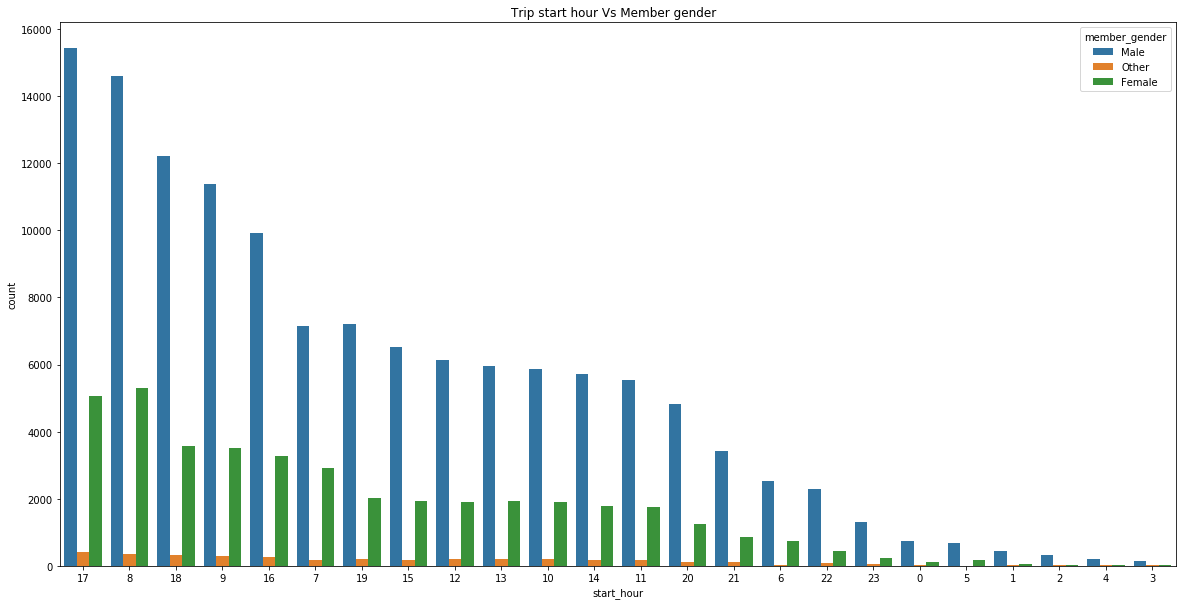

In [10]:
#get the count of member gender in each start_hour then plot a horizontal bar chart
plt.figure(figsize=[20, 10])
freq4 = df['start_hour'].value_counts()
gen_order4 = freq4.index
sb.countplot(data=df, x='start_hour', hue ='member_gender' , order=gen_order4 )
plt.title('Trip start hour Vs Member gender  ');

## (Visualization 3)

- top most frequent start stations

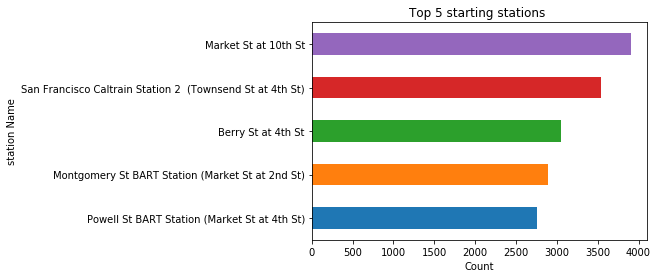

In [11]:
#top most frequent start stations
start = df.start_station_name.value_counts()[0:5].sort_values()
start.plot(kind = 'barh')
plt.title('Top 5 starting stations ')
plt.xlabel('Count')
plt.ylabel('station Name');

## (Visualization 4)

- top most frequent end stations

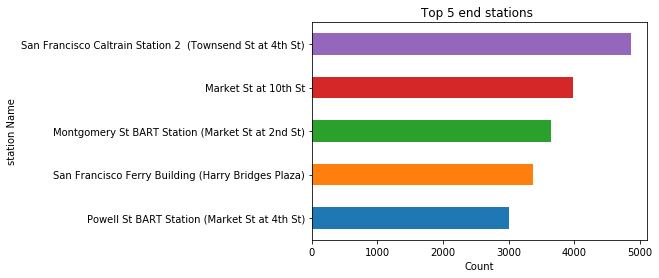

In [12]:
#top most frequent end stations
end = df.end_station_name.value_counts()[0:5].sort_values()
end.plot(kind = 'barh')
plt.title('Top 5 end stations ')
plt.xlabel('Count')
plt.ylabel('station Name');

## (Visualization 5)

- Top 5 Age groups Vs member gender  


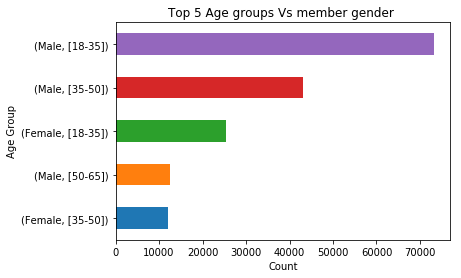

In [13]:
group = df.groupby(['member_gender'])['age_group'].value_counts().sort_values()
group[13:].plot(kind = 'barh' ,stacked=True)
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Top 5 Age groups Vs member gender ');

## (Visualization 6)

- member gender Vs User Type



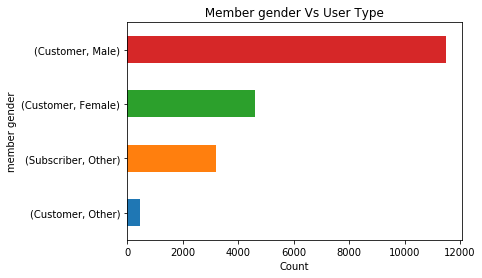

In [14]:
group2 = df.groupby(['user_type'])['member_gender'].value_counts().sort_values()
group2[0:4].plot(kind = 'barh' ,stacked=True)
plt.xlabel('Count')
plt.ylabel('member gender')
plt.title(' Member gender Vs User Type ');

## (Visualization 7)

- member gender Vs trip duration_min


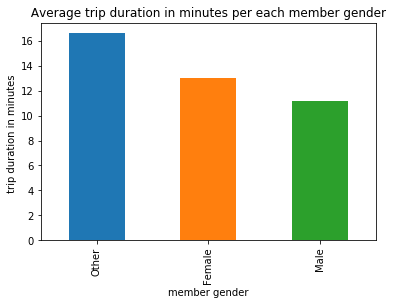

In [15]:
freq5 =df.groupby(['member_gender'])['duration_min'].mean().sort_values(ascending = False) 
freq5[0:4].plot(kind = 'bar')
plt.xlabel('member gender')
plt.ylabel(' trip duration in minutes  ')
plt.title(' Average trip duration in minutes per each member gender ');

## (Visualization 8)

- subscribers are more often using bike share service for short duration trips
- customers are more often using bike share service for long duration trips


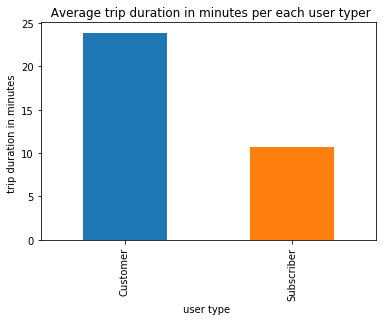

In [16]:
freq6 = df.groupby(['user_type'])['duration_min'].mean().sort_values(ascending = False)
 
freq6.plot(kind = 'bar')
plt.xlabel('user type ')
plt.ylabel(' trip duration in minutes  ')
plt.title('  Average trip duration in minutes per each user typer ');

## (Visualization 9)

- age group Vs duration_min


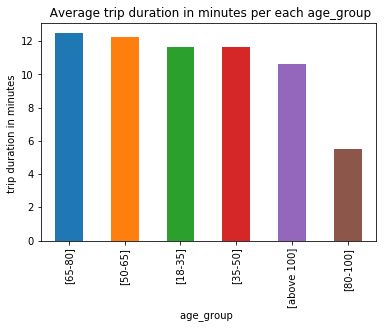

In [17]:
freq7 = df.groupby(['age_group'])['duration_min'].mean().sort_values(ascending = False)
 
freq7.plot(kind = 'bar')
plt.xlabel('age_group ')
plt.ylabel(' trip duration in minutes  ')
plt.title('  Average trip duration in minutes per each age_group ');

## (Multivariate Visualization )
## (Visualization 1)

- this figure shows trip start Hours for each age group Vs user type 

- Adult Males of ages [18-35] are the most frequent user from both user types ( subscriber - customer) 


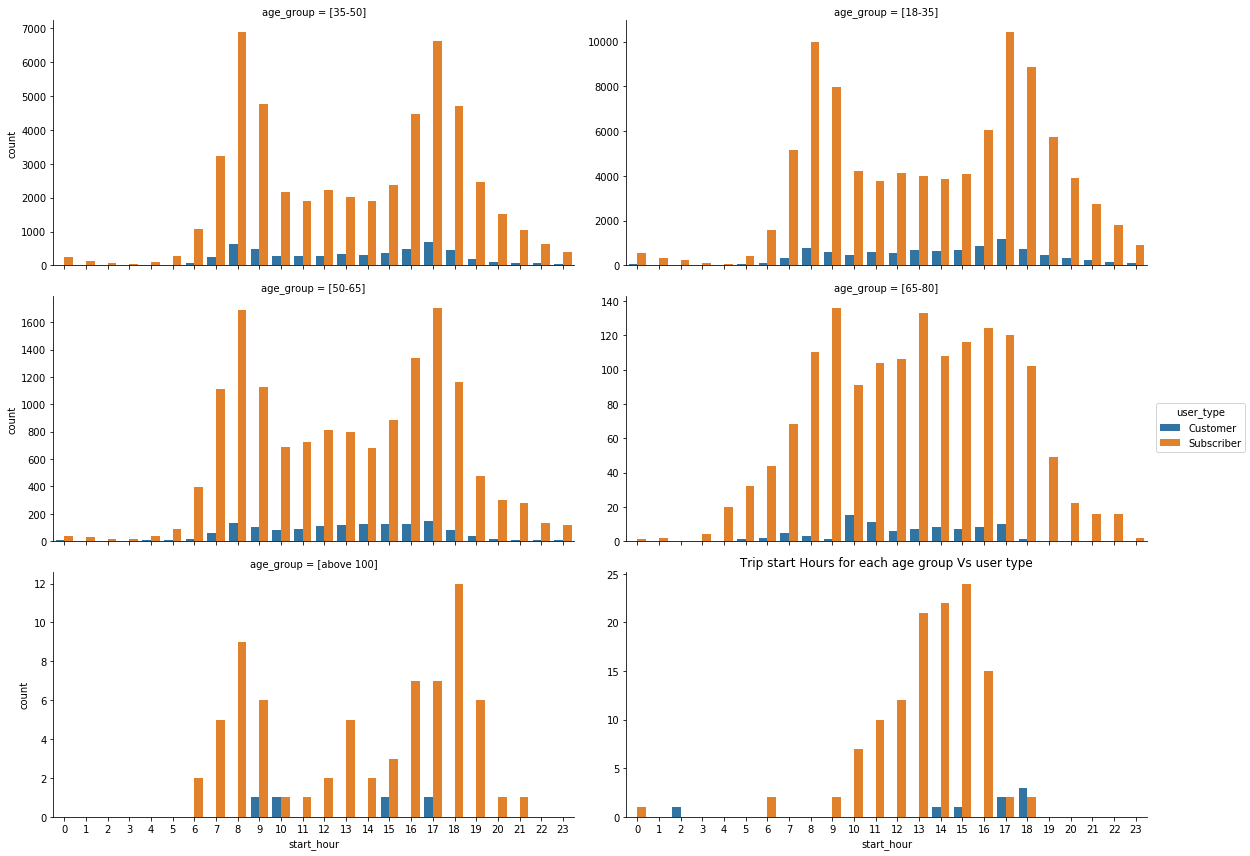

In [18]:
sb.factorplot(data=df ,x='start_hour',col='age_group',hue='user_type',sharey= False ,col_wrap= 2 ,aspect=2
              ,kind ='count',legend_out=True)
plt.title(' Trip start Hours for each age group Vs user type '); 


## (Visualization 2)
- this figure shows trip start Hours for each age group Vs Gender 
- Age group [18-35] are most frequent user for this service for both gender.
    - Males peak hours in all user types categories is 8 am and 5 pm 
    - Females peak hours in all user types categories is 8 am and 5 pm 


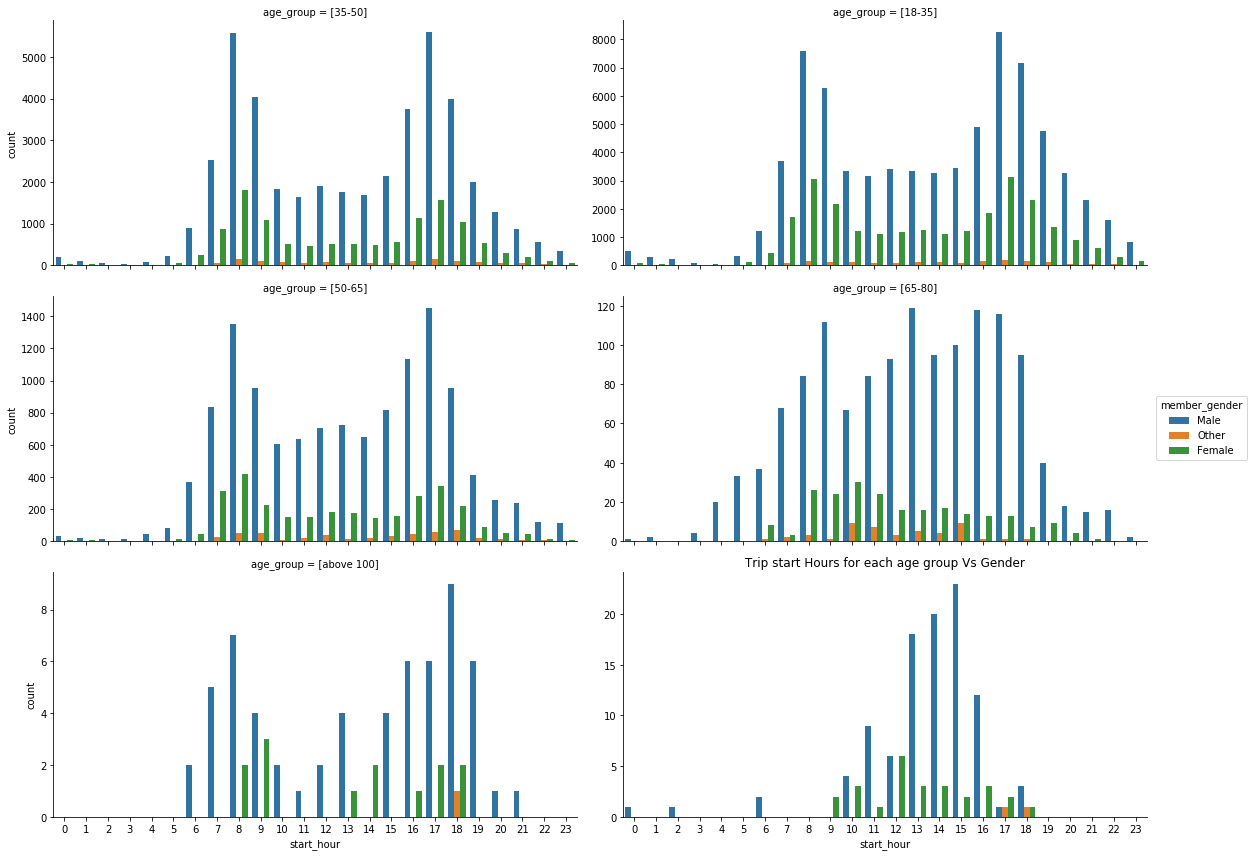

In [20]:
sb.factorplot(data=df ,x='start_hour',col='age_group',hue='member_gender' ,sharey= False ,col_wrap= 2 ,aspect =2
              ,kind ='count' ,legend_out=True)
plt.title(' Trip start Hours for each age group Vs Gender '); 

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 626244 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: n